In [17]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs.RecursiveVPSDE.Markovian_fBiPotDDims.recursive_Markovian_PostMeanScore_fBiPot8Dims_T256_H05_tl_110data_StbleTgt_FULLDATA import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
config = get_config()
num_paths = 1024 if config.feat_thresh == 1. else 10240
assert num_paths == 10240
root_dir = "/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"

In [19]:
import pandas as pd
def get_drift_files_nonfull(config, root_dir ):
    ts_type = f"{config.ndims}DDims"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/8DDims/"
    true_files = []
    local_files = []
    mses = []
    for file in os.listdir(root_nadaraya_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file:
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                local_files.append(root_nadaraya_dir+file)
            elif "bwidx" in file and "MSEs" not in file:
                mses_full = pd.read_parquet(root_nadaraya_dir+file)
                mses.append(mses_full)
    mses = pd.concat(mses).sort_values("bw", axis=0).dropna()
    print(mses)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[4][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws, mses

          bw          mse
0   0.000282  2133.398767
1   0.000372  2133.444170
2   0.000491  2133.383493
3   0.000649  2133.383490
4   0.000857  2133.292125
5   0.001131  2133.181589
6   0.001493  2132.974679
7   0.001972  2132.657919
8   0.002603  2131.990201
9   0.003437  2130.711924
10  0.004538  2128.385438
11  0.005992  2124.468616
12  0.007912  2117.919154
13  0.010446  2106.470528
14  0.013793  2085.946930
15  0.018211  2049.569029
16  0.024046  1992.154748
17  0.031749  1901.672408
18  0.041919  1757.791373
19  0.055348  1532.776545
20  0.073079  1204.643415
21  0.096490   790.377441
22  0.127401   390.737719
23  0.168214   139.140098
24  0.222102    40.285506
25  0.293252    12.972713
26  0.387196     6.479893
27  0.511235     4.385296
28  0.675010     3.434095
29  0.891251     3.145719
30  1.135011     3.345043
31  1.445440     3.793740


Text(0.5, 1.0, 'Minimum MSE is (3.1457187067744106, 29)')

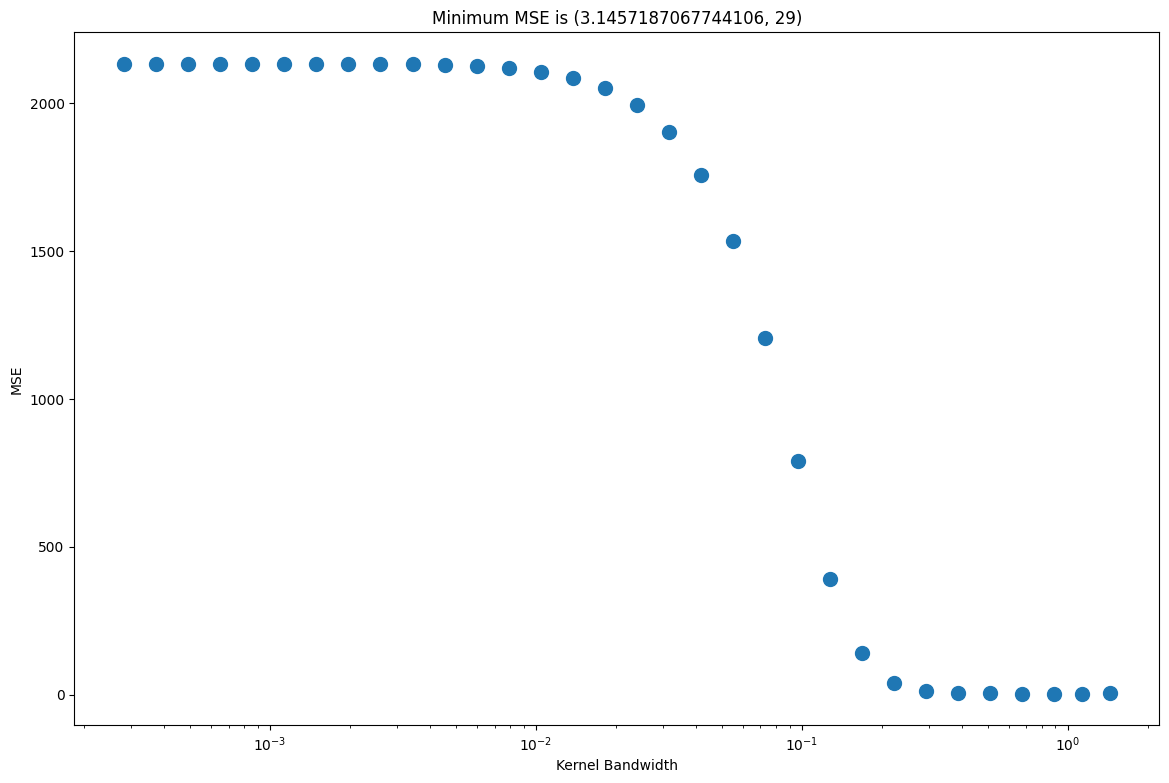

In [20]:
config = get_config()
true_files, local_files, bws, mses = get_drift_files_nonfull(config=config, root_dir=root_dir)
fig, ax = plt.subplots(figsize=(14,9))
mses.plot(kind="scatter", x="bw", y="mse", ax=ax, s=100)
ax.set_xscale("log")
ax.set_ylabel("MSE")
ax.set_xlabel("Kernel Bandwidth")
ax.set_title(f"Minimum MSE is {mses.iloc[np.argmin(mses.mse), 1], np.argmin(mses.mse)}")